# scTOP Vignette 1- Basics of Using a Source

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = 'notebook'
import sys
sys.path.append('/restricted/projectnb/crem-trainees/Kotton_Lab/Eitan/Vilker_Helper_Files/scTOP')
%load_ext autoreload
%autoreload 1
%aimport SimilarityHelper
%aimport TopObject

## Load MC-KO Basis
#### Created by Michael Herriges for the Kotton Lab

In [5]:
# This function uses only the lung subset, but you can use top.load_basis("MC-KO", 50) to get other areas as well
mouseBasis = SimilarityHelper.loadMCKOBasis()
mouseBasis

Loading...


Dendritic  Conventional Dendritic   Stromal         T  \
0610005C13Rik  -0.363237               -0.420853 -0.489457 -0.420707   
0610009B22Rik   1.222499                0.876963  1.182672  0.564469   
0610009O20Rik   1.052874                0.555854  1.303414  0.715321   
0610010F05Rik   0.603993                0.852842  1.196327  0.673758   
0610010K14Rik  -0.363237               -0.420853  0.734301 -0.420707   
...                  ...                     ...       ...       ...   
mt-Nd3          2.398027                2.174460  2.248160  2.490355   
mt-Nd4          2.706183                2.612577  3.198280  2.850854   
mt-Nd4l        -0.363237               -0.420853 -0.489457 -0.420707   
mt-Nd5          2.598674                2.583376  2.612577  2.744423   
mt-Nd6          0.584710                0.751337  0.509691  0.721360   

                      B   Nuocyte  Alveolar Macrophage  \
0610005C13Rik -0.463180 -0.339525            -0.473518   
0610009B22Rik  0.884526  1.424294             1.230700   
0610009O20Rik  0.989996  0.759492             0.776047   
0610010F05Rik  0.505976  1.001539             0.744110   
0610010K14Rik  0.423585 -0.339525            -0.473518   
...                 ...       ...                  ...   
mt-Nd3         2.475814  2.392160             2.557978   
mt-Nd4         2.803735  2.774421             3.492480   
mt-Nd4l       -0.463180 -0.339525            -0.473518   
mt-Nd5         2.777563  2.698481             2.992723   
mt-Nd6         0.978960 -0.339525             0.661101   

               Interstitial Macrophage  Plasmacytoid Dendritic  Endothelial  \
0610005C13Rik                -0.386257               -0.385719    -0.416742   
0610009B22Rik                 1.286765                1.053454     1.072092   
0610009O20Rik                 0.686271                1.085328     1.685823   
0610010F05Rik                 0.755541                0.783363     1.024641   
0610010K14Rik                -0.386257                0.679539    -0.416742   
...                                ...                     ...          ...   
mt-Nd3                        2.318568                2.210577     2.437673   
mt-Nd4                        2.759112                2.596728     3.128885   
mt-Nd4l                      -0.386257               -0.385719    -0.416742   
mt-Nd5                        2.631228                2.457661     2.744423   
mt-Nd6                        0.889662                0.803540     0.464962   

               Neutrophil Granulocyte        NK  Eosinophil Granulocyte  \
0610005C13Rik               -0.216604 -0.392008               -0.335257   
0610009B22Rik                0.993211  0.608758               -0.335257   
0610009O20Rik                1.256989  0.755674                1.048591   
0610010F05Rik               -0.216604  0.711454                1.111274   
0610010K14Rik               -0.216604 -0.392008               -0.335257   
...                               ...       ...                     ...   
mt-Nd3                       2.076951  2.246495                2.131188   
mt-Nd4                       2.540797  2.641999                2.494822   
mt-Nd4l                     -0.216604 -0.392008               -0.335257   
mt-Nd5                       2.379536  2.633358                2.681108   
mt-Nd6                      -0.216604  0.635364                0.918748   

               Dividing T       AT1       AT2  Ciliated      Club     Basal  
0610005C13Rik   -0.273888 -0.930014 -0.491321 -0.388592 -0.491472 -0.785004  
0610009B22Rik    1.292429  1.056622  0.808241  0.881634  1.142030  0.187124  
0610009O20Rik   -0.273888  0.357335  0.408575  0.178013  0.318675  0.693672  
0610010F05Rik    0.899606  0.506468  0.223322  0.869469 -0.036788  0.012439  
0610010K14Rik   -0.273888  0.138330  0.376074  0.337163  0.508141  0.761826  
...                   ...       ...       ...       ...       ...       ...  
mt-Nd3           2.351121  2.255261  2.495104  2.483252  

## Load Test Dataset

In [2]:
riemondy = TopObject.TopObject("Riemondy")

Setting AnnData object...
Setting metadata...
Setting DataFrame...
Processing scTOP data...
Finished setup!


In [5]:
# Get overview of dataset parameters
print(riemondy)

Attributes:
name: Riemondy
dataset: /restricted/projectnb/crem-trainees/Kotton_Lab/Eitan/Vilker_Helper_Files/scTOP/DatasetInformation.csv
cellTypeColumn: labeled_clusters
toKeep: [Basal, Injured Type II, Naive Type I, Naive Type II, Transdifferentiating Type II]...
toExclude: ['']
filePath: /restricted/projectnb/crem-trainees/Kotton_Lab/Eitan/OutsidePaperObjects/AnnData/Riemondy.h5ad
timeColumn: None
duplicates: False
raw: False
layer: None
anndata: <class 'anndata._core.anndata.AnnData'>
metadata: ['orig.ident', 'sample_names', 'expt', 'new_expt_id', 'proportion.mito']...
annotations: ['Endothelial', 'Basal', 'Basal', 'Club', 'Basal']...
sortedCellTypes: [Basal, Cell Cycle Arrest Type II, Ciliary, Club, Endothelial]...
timeSortFunction: None
timesSorted: None
df: ['ATI1expt1_AAACGGGAGTGTTTGC', 'ATI1expt1_AAAGTAGGTTCCACTC', 'ATI1expt1_AACCATGTCGAGAGCA', 'ATI1expt1_AACTCAGGTAAACCTC', 'ATI1expt1_AACTCTTCAAGCCCAC']...
processedData: ['ATI1expt1_AAACGGGAGTGTTTGC', 'ATI1expt1_AAAGTAGGTTCCAC

In [8]:
# Project onto basis
riemondy.projectOntoBasis(mouseBasis, "MC-KO")

Projecting onto basis...
Finished projecting! 17520 genes were in both the source and basis.


index                    ATI1expt1_AAACGGGAGTGTTTGC  \
Dendritic                                  0.038549   
Conventional Dendritic                    -0.026696   
Stromal                                    0.181628   
T                                         -0.025890   
B                                         -0.061733   
Nuocyte                                    0.037887   
Alveolar Macrophage                       -0.048637   
Interstitial Macrophage                    0.005333   
Plasmacytoid Dendritic                     0.026314   
Endothelial                                0.003271   
Neutrophil Granulocyte                     0.080433   
NK                                         0.005790   
Eosinophil Granulocyte                     0.021207   
Dividing T                                 0.075580   
AT1                                        0.065072   
AT2                                       -0.102085   
Ciliated                                   0.038414   
Club                                       0.094126   
Basal                                      0.145313   

index                    ATI1expt1_AAAGTAGGTTCCACTC  \
Dendritic                                  0.018022   
Conventional Dendritic                    -0.003667   
Stromal                                    0.039954   
T                                         -0.014028   
B                                         -0.029112   
Nuocyte                                    0.030856   
Alveolar Macrophage                       -0.014280   
Interstitial Macrophage                    0.004377   
Plasmacytoid Dendritic                    -0.017185   
Endothelial                                0.021718   
Neutrophil Granulocyte                     0.060303   
NK                                         0.007312   
Eosinophil Granulocyte                     0.008994   
Dividing T                                 0.049269   
AT1                                       -0.007976   
AT2                                       -0.071931   
Ciliated                                   0.017344   
Club                                       0.075628   
Basal                                      0.213380   

index                    ATI1expt1_AACCATGTCGAGAGCA  \
Dendritic                                  0.051163   
Conventional Dendritic                    -0.027891   
Stromal                                    0.048475   
T                                         -0.018824   
B                                         -0.027580   
Nuocyte                                    0.021227   
Alveolar Macrophage                       -0.026686   
Interstitial Macrophage                    0.002560   
Plasmacytoid Dendritic                    -0.007562   
Endothelial                                0.018450   
Neutrophil Granulocyte                     0.066668   
NK                                         0.017345   
Eosinophil Granulocyte                     0.018858   
Dividing T                                 0.069441   
AT1                                        0.000814   
AT2                                       -0.109587   
Ciliated                                   0.042375   
Club                                       0.077605   
Basal                                      0.264564   

index                    ATI1expt1_AACTCAGGTAAACCTC  \
Dendritic                                  0.022537   
Conventional Dendritic                    -0.019304   
Stromal                                    0.053073   
T                                         -0.019330   
B                                         -0.021650   
Nuocyte                                    0.028462   
Alveolar Macrophage                       -0.022160   
Interstitial Macrophage                   -0.006506   
Plasmacytoid Dendritic                     0.014838   
Endothelial                                0.030688   
Neutrophil Granulocyte                     0.067354   
NK                                   

## Plot source dataset against two labels of basis

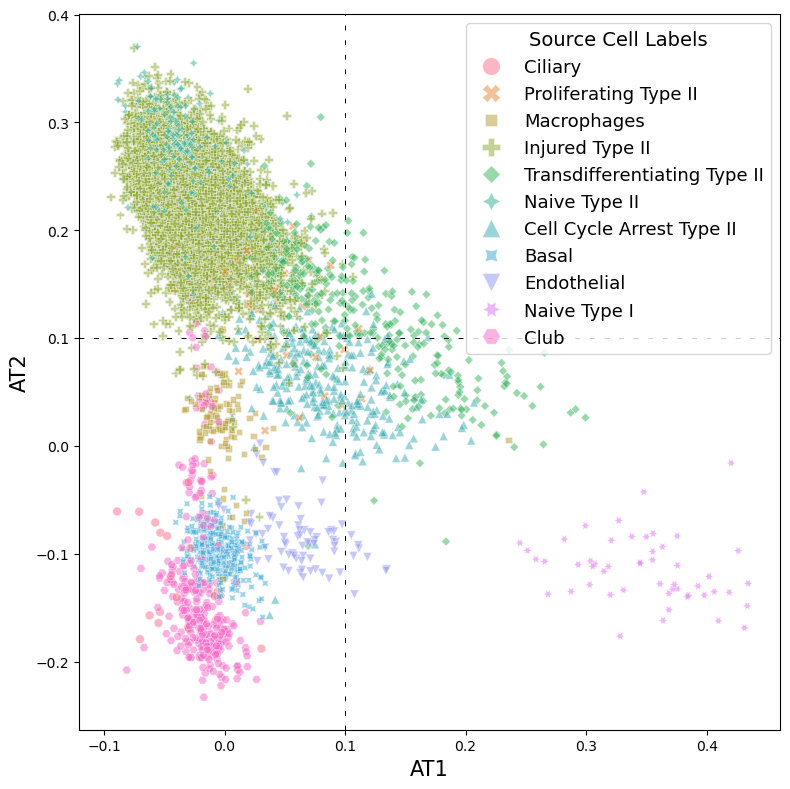

In [12]:
# Make 2D plot against basis
SimilarityHelper.plotTwo(riemondy.projections["MC-KO"], riemondy.annotations, 'AT1', 'AT2')

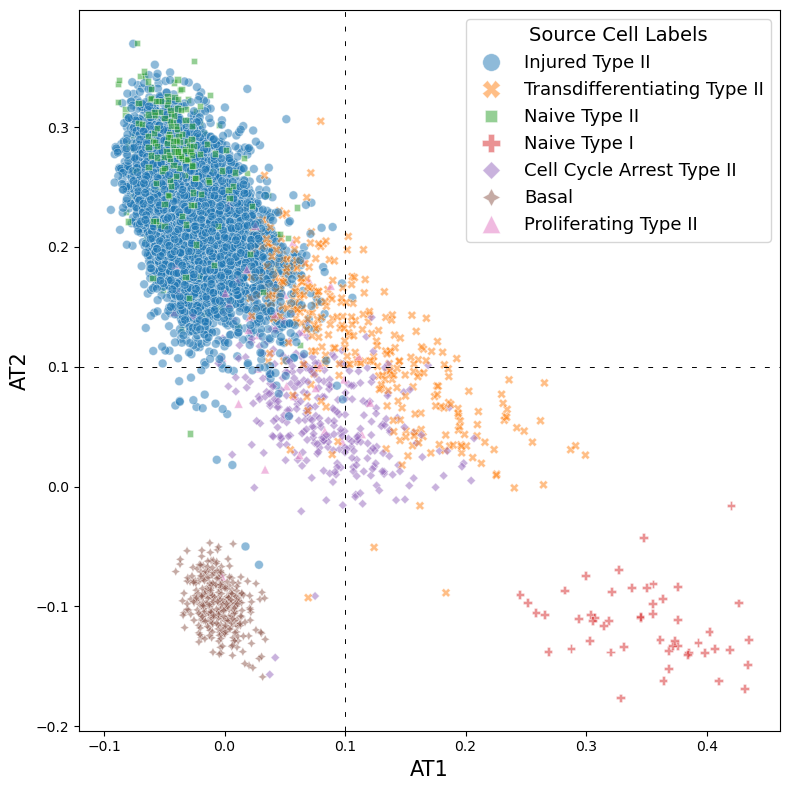

In [13]:
# Now plot with just the preset of features we care about. You can adjust this by setting your own inclusion criteria, or by adjusting the contents of toKeep
toKeep = ["Naive Type I", "Naive Type II", "Injured Type II", "Transdifferentiating Type II", "Cell Cycle Arrest Type II", "Proliferating Type II", "Basal"]
includeCriteria = riemondy.annotations.isin(toKeep)
SimilarityHelper.plotTwo(riemondy.projections["MC-KO"], riemondy.annotations, 'AT1', 'AT2',
            includeCriteria=includeCriteria)

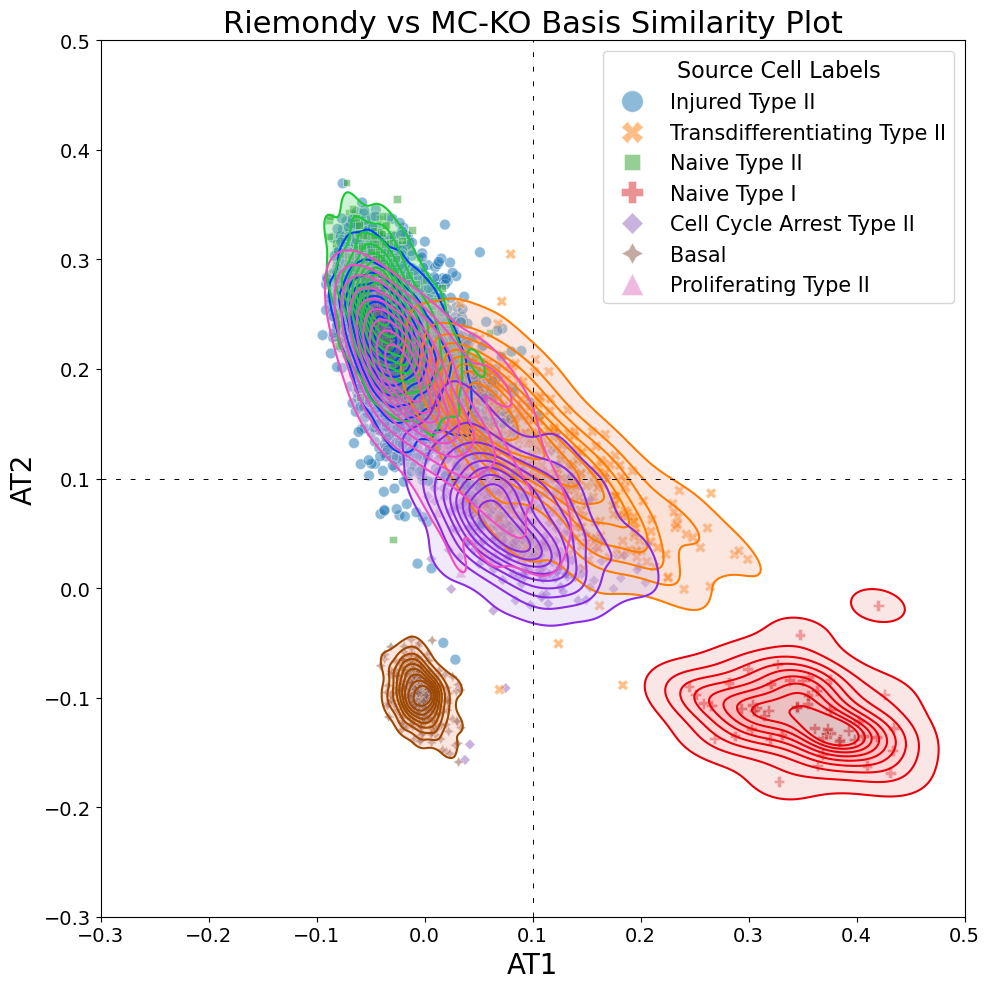

In [16]:
# Now repeat with more parameters
SimilarityHelper.plotTwo(riemondy.projections["MC-KO"], riemondy.annotations, axis1, axis2,
         includeCriteria=includeCriteria, xBounds=(-0.3, 0.5), yBounds=(-0.3, 0.5),
         title="Riemondy vs MC-KO Basis Similarity Plot", axisFontSize=20, legendFontSize=15,
         figX=10, figY=10, markerSize=60, supervisedContour=True, outFile="MyFigure.png"
)

## Add new dataset or modify starting parameters

In [2]:
## Add dataset with prompts to guide you
summaryFile = "/restricted/projectnb/crem-trainees/Kotton_Lab/Eitan/Vilker_Helper_Files/scTOP/DatasetInformation.csv"
TopObject.dynamicAddDataset(summaryFile=summaryFile)

Assign name. Enter a name to describe your dataset (if updating existing entry, choose the same name): riemondy
Assign filePath. Enter the file path corresponding to the anndata object (.h5ad) for your dataset: 
Assign cellTypeColumn. Enter the title of the column containing cell type annotations: 
Assign toKeep. Press Y to enter a list of cell types that you may filter to later or press Enter to skip: 
Assign toExclude. Press Y to enter a list of cell types that you may filter out later or press Enter to skip: Y
Enter a cell type to exclude in filtering or press Enter to continue Ciliated
Enter a cell type to exclude in filtering or press Enter to continue Multiciliated
Enter a cell type to exclude in filtering or press Enter to continue Basal
Enter a cell type to exclude in filtering or press Enter to continue 
Assign timeColumn, Enter the title of the column containing times samples were collected or press Enter to skip: Q


Quit successfully!


In [ ]:
## See the CrossPlatformConversions folder for how to generate the AnnData (.h5ad) file needed from a Seurat file

# To remove an entry from the summary file
TopObject.deleteDataset(summaryFile, "DummyName")

## Plot gene expression

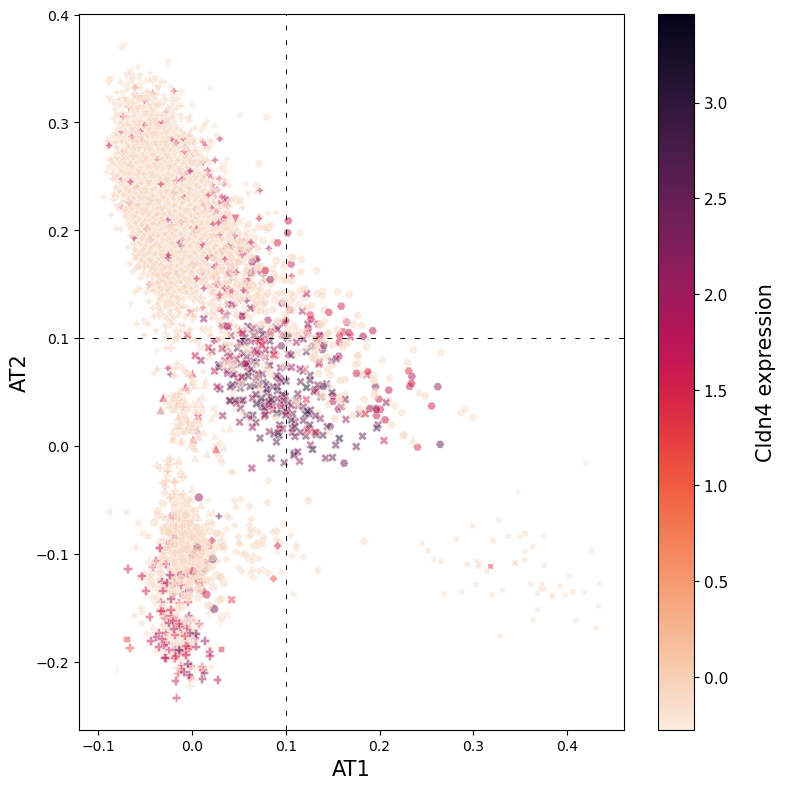

In [19]:
# You can do this option with plotTwo by simply passing in the gene of interest (case sensitive)
# to the gene parameter as well as the processedData to geneExpressions
SimilarityHelper.plotTwo(riemondy.projections["MC-KO"], riemondy.annotations, 'AT1', 'AT2',
         gene='Cldn4', geneExpressions=riemondy.processedData)

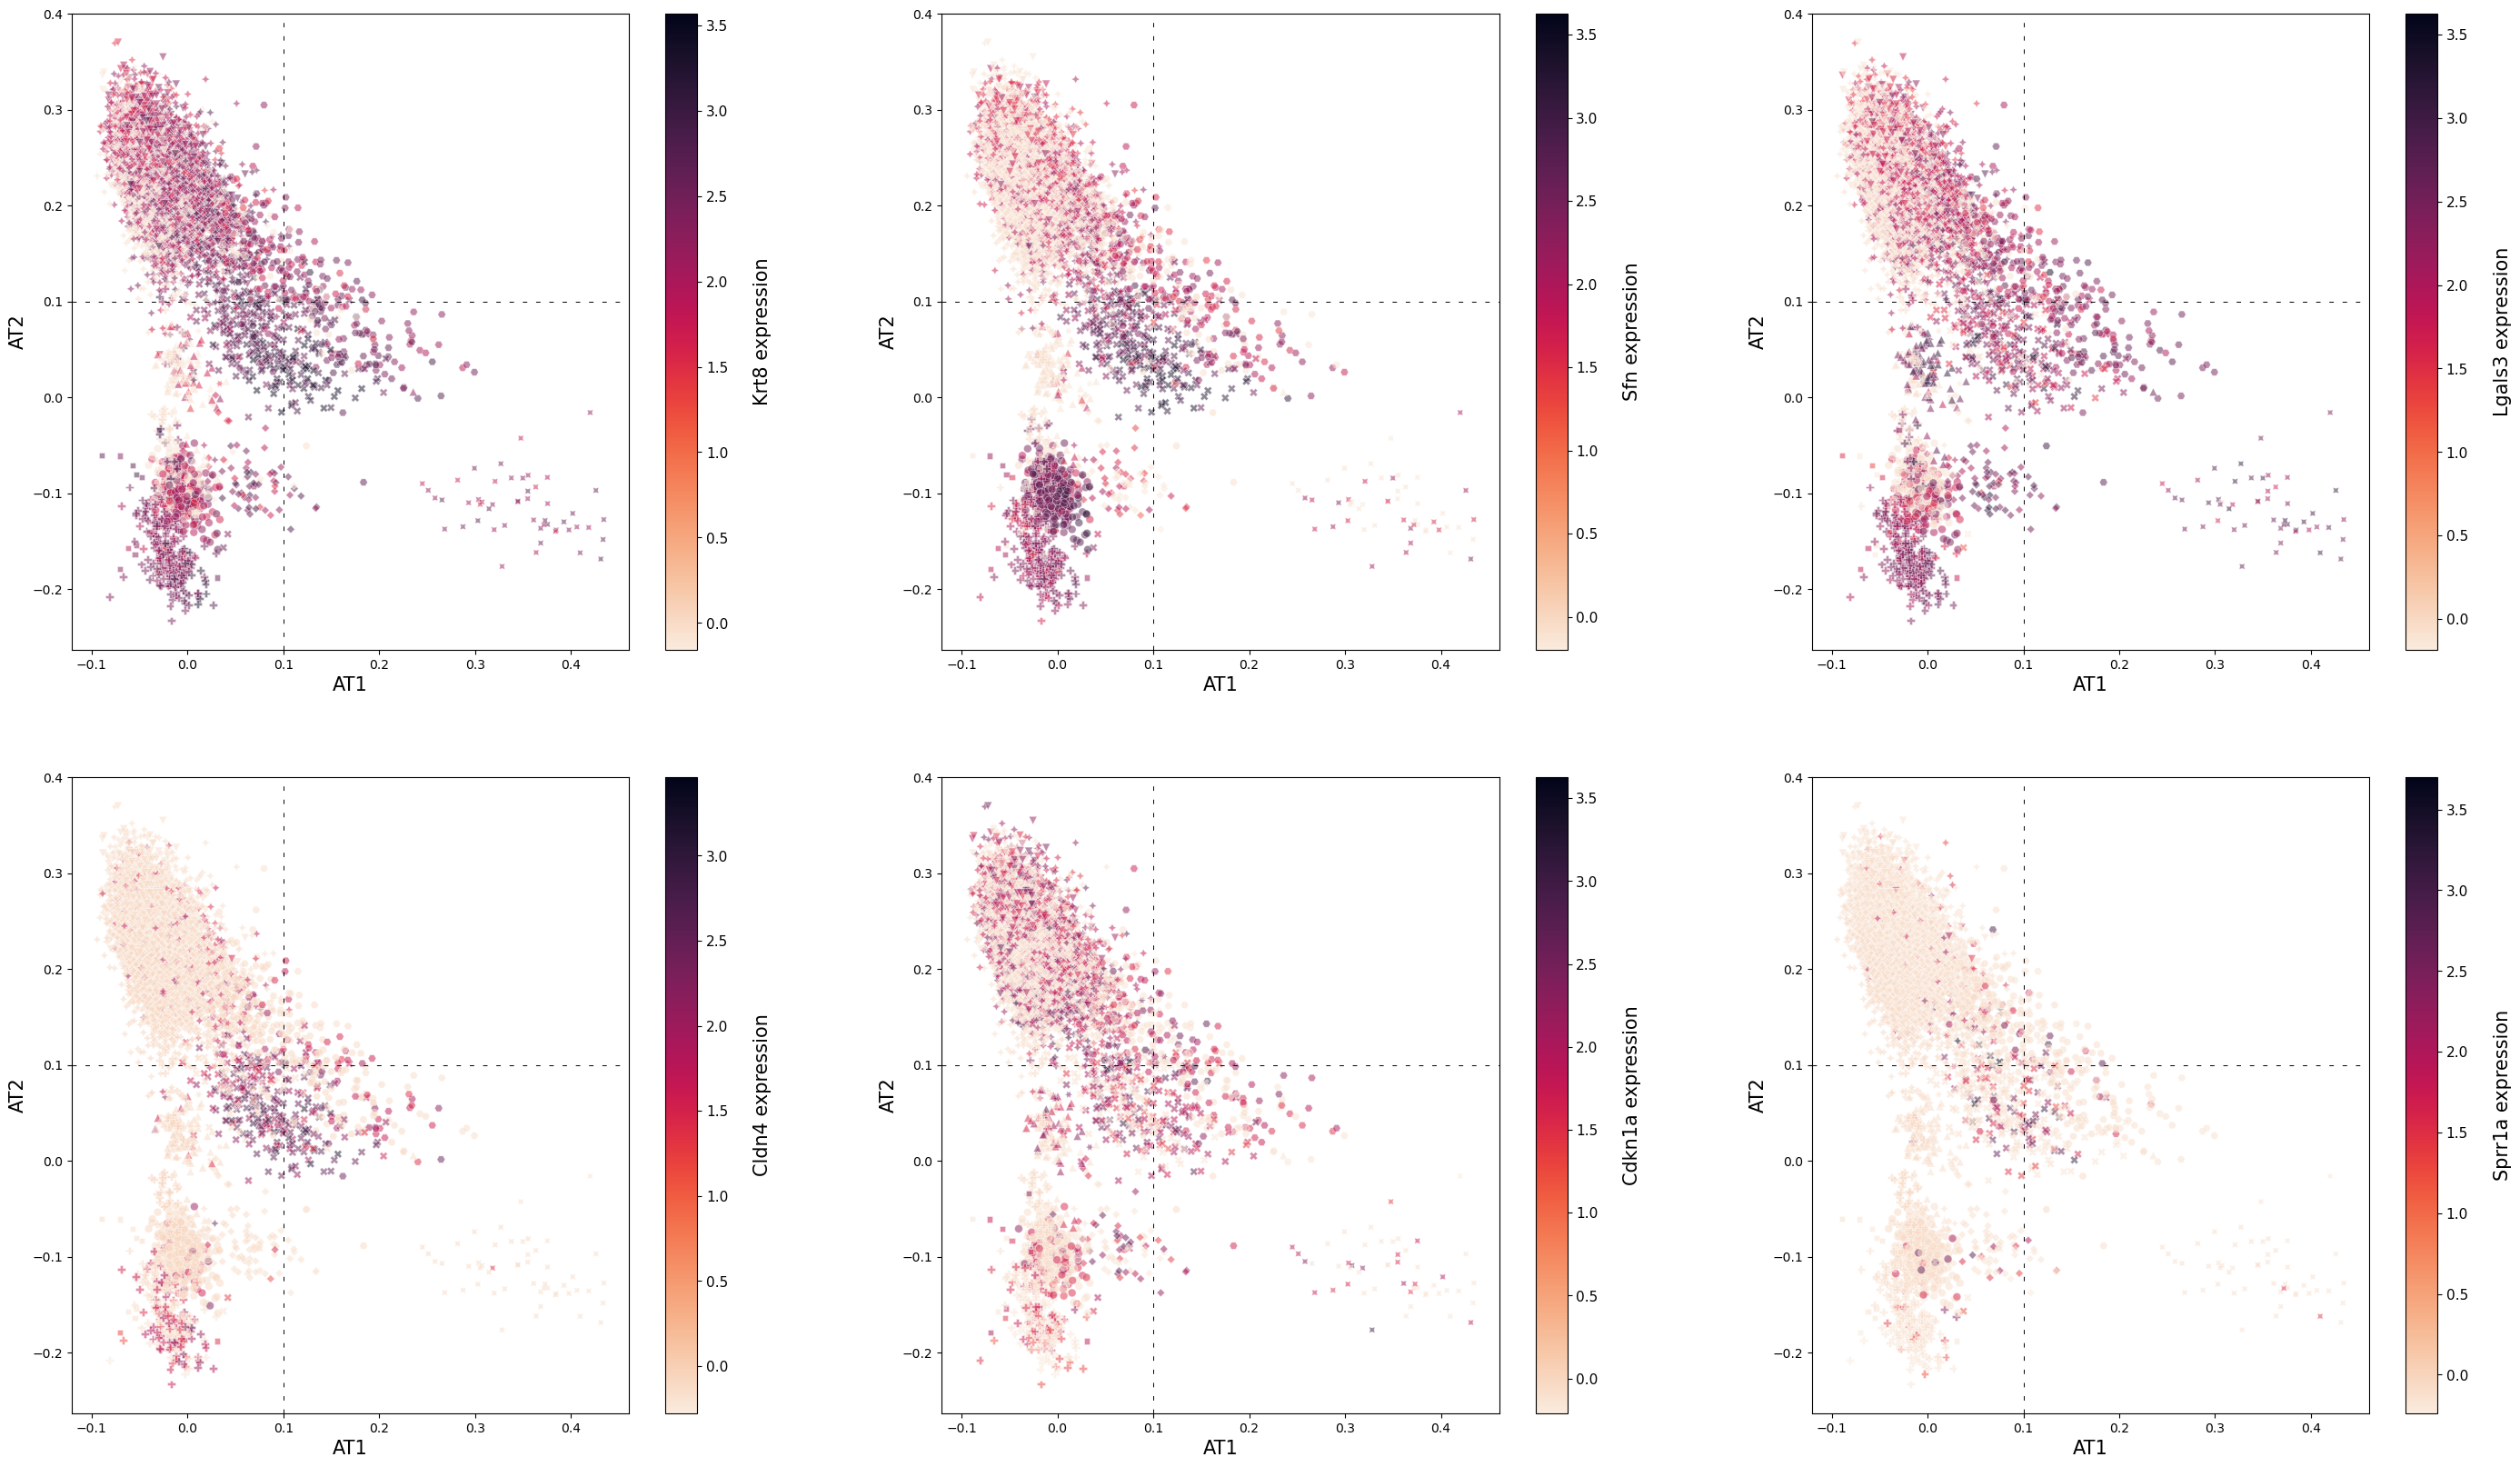

In [18]:
# Some code for if you want to plot a bunch at the same time
fig, ax = plt.subplots(2, 3, figsize=(35,20))
marker_genes = ['Krt8', 'Sfn', 'Lgals3', 'Cldn4', 'Cdkn1a', 'Sprr1a']
axs = ax.flatten()
for i, gene in enumerate(marker_genes):
    SimilarityHelper.plotTwo(riemondy.projections["MC-KO"], riemondy.annotations, 'AT1', 'AT2',
             gene=gene, geneExpressions=riemondy.processedData, ax=axs[i], plotMultiple=True)
# plt.savefig('/Your/Path/Here.png')
plt.show()

## Plot boxplot of desired features of source against relevant features of basis

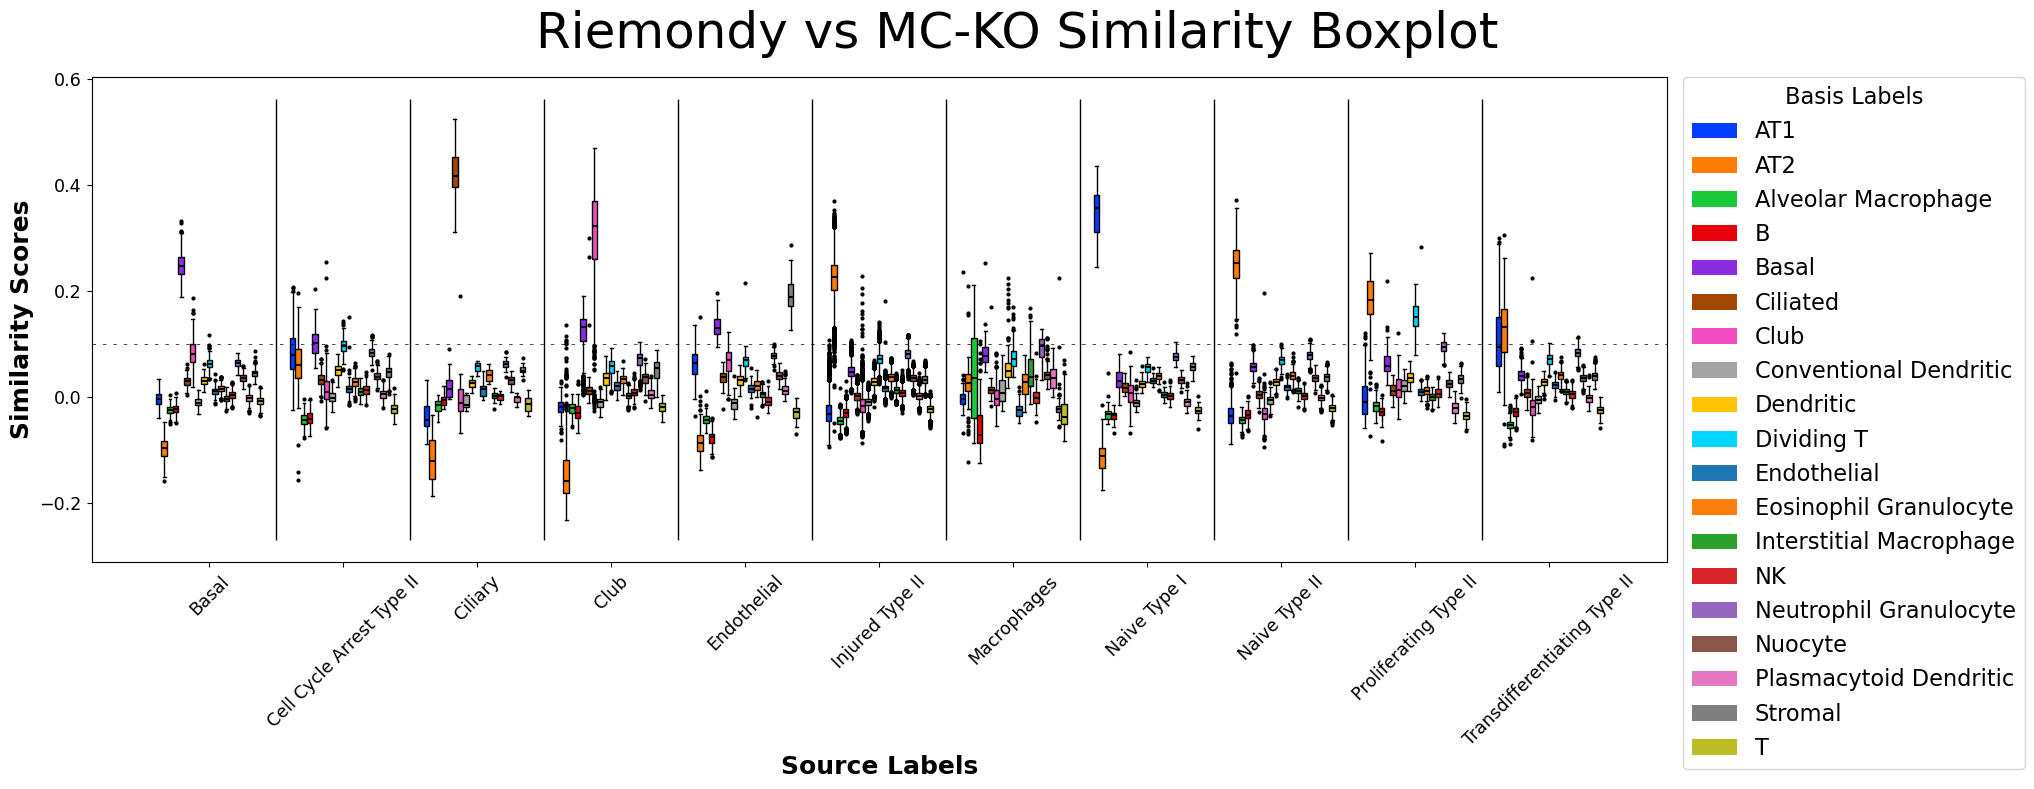

In [24]:
# First step: Create map of basis labels to the projections of cells with each source label onto said basis labels
riemondySimilarityMap = SimilarityHelper.getMatchingProjections(riemondy, riemondy.projections["MC-KO"])

# Second step: Set basic parameters like plot size and title and generate boxplot
SimilarityHelper.similarityBoxplot(riemondySimilarityMap, title="Riemondy vs MC-KO Similarity Boxplot")

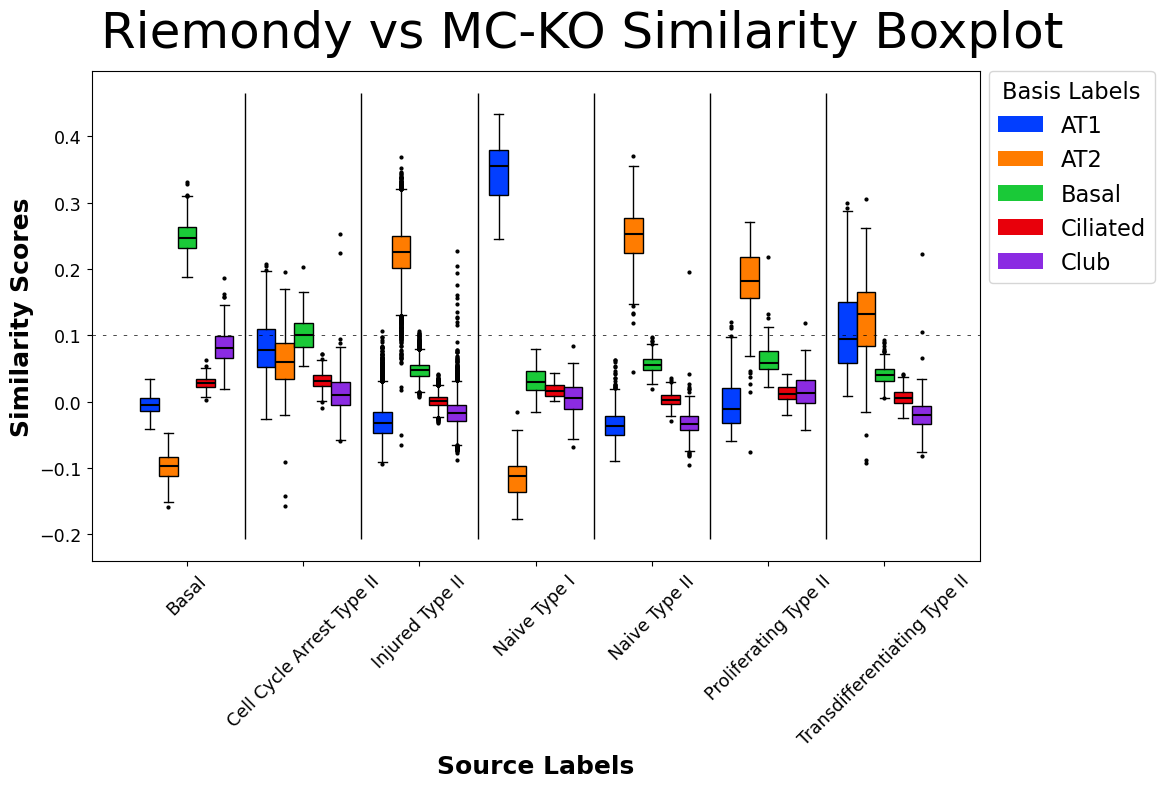

In [27]:
# It can help a lot to specify which features you are interested in for the source and basis
epithelialFeatures = riemondy.toKeep
basisKept = ['AT1', 'AT2', 'Basal', "Ciliated", "Club"]
riemondySimilarityMap = SimilarityHelper.getMatchingProjections(riemondy, riemondy.projections["MC-KO"], 
                                                                basisKeep=basisKept, sourceKeep=epithelialFeatures)
SimilarityHelper.similarityBoxplot(riemondySimilarityMap, title="Riemondy vs MC-KO Similarity Boxplot")

## Plot over multiple time points

In [28]:
# To do this, you just need to have a time column appropriately identified in your dataset. We'll load such a dataset
# Data processing can be very slow. It can help to filter beforehand, as done here with keep=True
# to only include types listed in toKeep
bibek = TopObject.TopObject("Bibek", keep=True)
bibek.projectOntoBasis(mouseBasis, "MC-KO")

Setting AnnData object...
Setting metadata...
Filtering TopObject...
Finished filtering!
Setting DataFrame...
Processing scTOP data...
Finished setup!
Projecting onto basis...
Finished projecting! 16683 genes were in both the source and basis.


AAACCCACAACTCCCT_1_1  AAACCCACATCTAACG_1_1  \
Dendritic                           -0.001323              0.002280   
Conventional Dendritic               0.023879              0.003351   
Stromal                             -0.011750             -0.001615   
T                                   -0.024213             -0.009002   
B                                   -0.026038             -0.029949   
Nuocyte                              0.021856              0.039768   
Alveolar Macrophage                 -0.064677             -0.035614   
Interstitial Macrophage              0.006823              0.000973   
Plasmacytoid Dendritic              -0.005867             -0.005595   
Endothelial                          0.029617              0.002860   
Neutrophil Granulocyte               0.069396              0.052939   
NK                                   0.001754             -0.005668   
Eosinophil Granulocyte               0.042255              0.039087   
Dividing T                           0.029184              0.047116   
AT1                                 -0.007169             -0.001265   
AT2                                  0.447626              0.342873   
Ciliated                             0.004494             -0.004889   
Club                                -0.120241             -0.071039   
Basal                                0.098023              0.065840   

                         AAACGAAGTCACCTTC_1_1  AAACGAAGTCACTCGG_1_1  \
Dendritic                            0.040357              0.000428   
Conventional Dendritic              -0.022897             -0.004433   
Stromal                              0.007540              0.000172   
T                                   -0.024295             -0.018448   
B                                   -0.048863             -0.027390   
Nuocyte                              0.019443              0.036122   
Alveolar Macrophage                 -0.046155             -0.062793   
Interstitial Macrophage              0.006940              0.015389   
Plasmacytoid Dendritic              -0.002952             -0.004272   
Endothelial                          0.016938              0.020510   
Neutrophil Granulocyte               0.073860              0.064928   
NK                                  -0.005700              0.001833   
Eosinophil Granulocyte               0.038195              0.038984   
Dividing T                           0.049834              0.041602   
AT1                                  0.215238             -0.042582   
AT2                                  0.196138              0.425167   
Ciliated                             0.031450             -0.000170   
Club                                -0.081940             -0.111557   
Basal                                0.104634              0.101554   

                         AAACGAATCGTGCACG_1_1  AAACGCTAGATAACGT_1_1  \
Dendritic                            0.005444              0.010816   
Conventional Dendritic              -0.005560              0.004459   
Stromal                              0.024367             -0.001935   
T                                   -0.045608             -0.035957   
B                                   -0.030907             -0.036361   
Nuocyte                              0.015728              0.017277   
Alveolar Macrophage                 -0.032780             -0.032074   
Interstitial Macrophage              0.003212              0.012176   
Plasmacytoid Dendritic              -0.019788             -0.013542   
Endothelial                          0.046190              0.012844   
Neutrophil Granulocyte               0.054614              0.062204   
NK                                  -0.015985             -0.003942   
Eosinophil Granulocyte               0.043629              0.051034   
Dividing T                           0.033566              0.059903   
AT1                                  0.564058             -0.067592   
AT2                                 -0.041703  

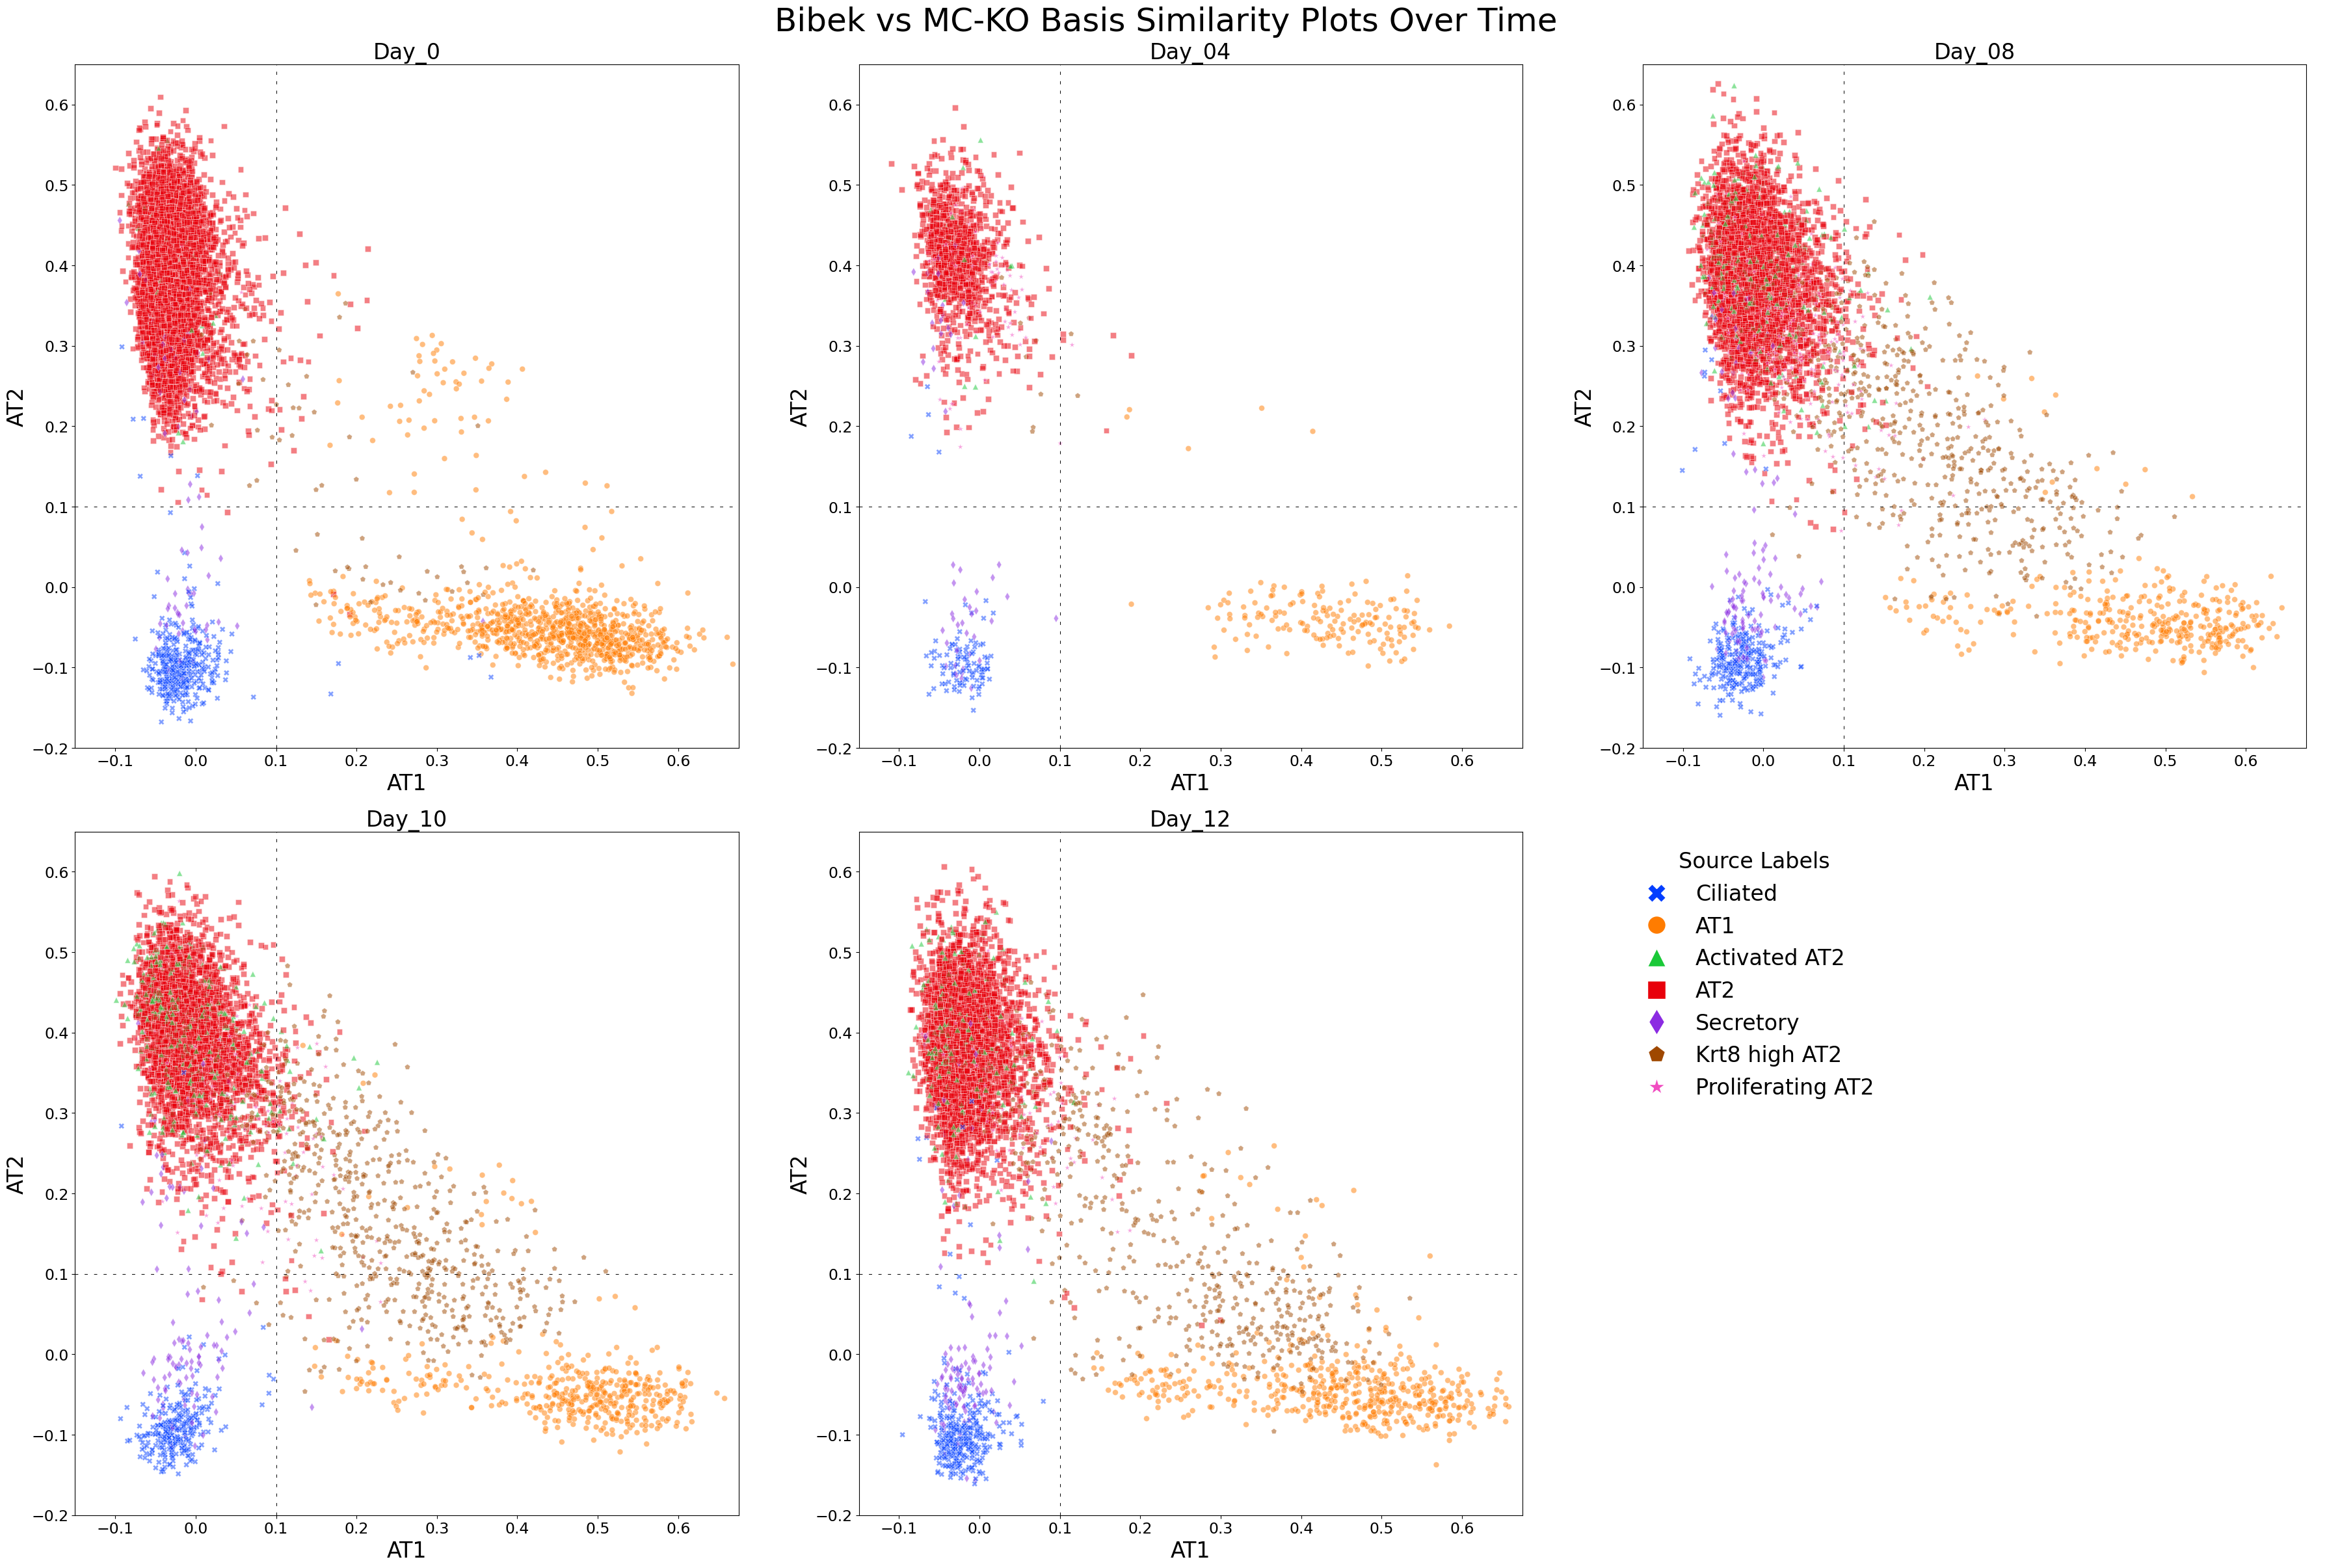

In [41]:
# So long as the time information was properly uploaded to the TopObject, you're set to run with no changes
includeCriteria = bibek.annotations.isin(bibek.toKeep)
SimilarityHelper.plotTwoMultiple(
    bibek, bibek.projections["MC-KO"], 'AT1', 'AT2',
    includeCriteria=includeCriteria, xBounds=(-0.15, 0.675), yBounds=(-0.2, 0.65),
    title="Bibek vs MC-KO Basis Similarity Plots Over Time"
)